## AI cartoon portrait generator
### google colab version

In [ ]:
!pip install bing-image-downloader

In [ ]:
import os
import numpy as np
from bing_image_downloader import downloader
import requests

In [ ]:
person_list = ['Betty White', 'Denzel Washington', 'Morgan Freeman', 'Dwayne Johnson', 'Ariana Grande', 'Barack Obama', 'XXXTentacion'
                , 'Michael Jackson', 'Scarlett Johansson', 'LeBron James', 'Muhammad Ali', 'Eminem', 'Jennifer Aniston', 'Taylor Swift'
                , 'Johnny Depp', 'Tupac Shakur', 'Jeff Bezos', 'Tom Cruise', 'Abraham Lincoln', 'Elvis Presley', 'Angelina Jolie'
                , 'Lady Gaga', 'John F. Kennedy', 'Jennifer Lopez', 'Will Smith', 'Kanye West', 'Stephen Curry'
                , 'Selena Gomez', 'Beyonce Knowles', 'Bruce Lee', 'Robin Williams', 'Marilyn Monroe', 'Robert Downey Jr.'
                , 'John Cena', 'Brad Pitt', 'Juice WRLD', 'Serena Williams', 'Jennifer Lawrence', 'Britney Spears'
                , 'Snoop Dogg', 'Shaquille O’ Neal', 'Mike Tyson', 'Ronald Reagan', 'Jim Carrey', 'Tom Hanks'
                , 'Joaquin Phoenix', 'Adam Sandler', 'Emma Stone', 'Katy Perry', 'Matthew McConaughey', 'Travis Scott'
                , 'Walt Disney', 'Frank Sinatra', 'Natalie Portman', 'Sundar Pichai', 'Kurt Cobain', 'Dr. Dre'
                , 'Patrick Swayze', 'Anne Hathaway', 'Ice Cube', 'Clint Eastwood', 'The Notorious B.I.G.', 'Warren Buffett'
                , 'Nicole Kidman', 'Jake Gyllenhaal', 'Floyd Mayweather Jr.', 'Eddie Murphy', 'Michael Phelps', 'Cameron Diaz','Robert De Niro' ]

### Parse images from bing

In [ ]:
for person in person_list:
  downloader.download(person, limit=20,  output_dir='dataset',
                      adult_filter_off=True, force_replace=False,
                      timeout=60, verbose=True)

Выходные данные были обрезаны до нескольких последних строк (5000).
Please show your support here
https://www.buymeacoffee.com/gurugaurav


[%] Downloading Images to /content/dataset/Tom Cruise


[!!]Indexing page: 1

[%] Indexed 20 Images on Page 1.


[%] Downloading Image #1 from https://i0.wp.com/bestlifeonline.com/wp-content/uploads/2018/07/tom-cruise-young.jpg?w=638&amp;ssl=1
[!] Issue getting: https://i0.wp.com/bestlifeonline.com/wp-content/uploads/2018/07/tom-cruise-young.jpg?w=638&amp;ssl=1
[!] Error:: HTTP Error 404: File Not Found
[%] Downloading Image #1 from https://i.pinimg.com/736x/5b/80/9a/5b809abd685d8216ee395f590e7d747e.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://cdn.thelivemirror.com/wp-content/uploads/2019/07/Tom-Cruise.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.nydailynews.com/resizer/NEle-vV49Bu9wJdjPBFhgMgB54U=/1200x1882/top/arc-anglerfish-arc2-prod-tronc.s3.amazonaws.com/public/W5GQLH7A63CUQWY323QMRM3JGY.jpg
[%] File

### Source image

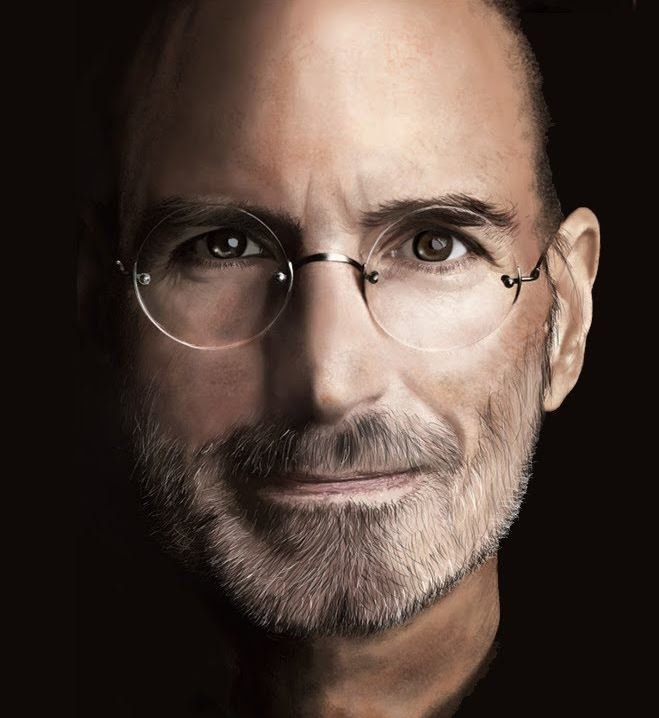

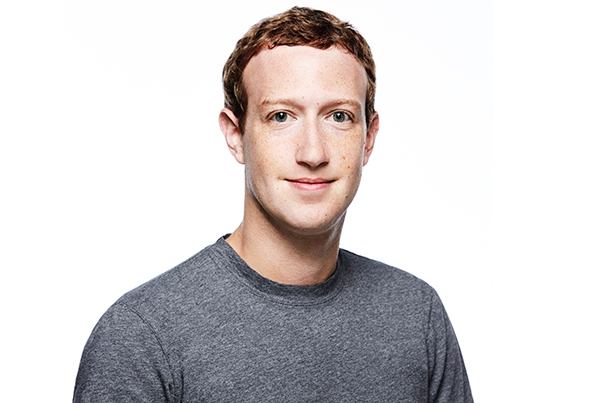

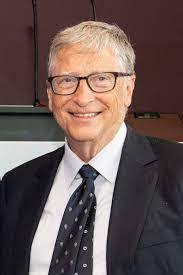


## [Toonify API](https://deepai.org/machine-learning-model/toonify)

In [ ]:
dataset_path = '/content/dataset'
out_path = '/content/out'

In [ ]:
try:
  os.mkdir(out_path)
except:
  print('Folder Exist!')

Folder Exist!


In [ ]:
for fold in os.listdir(dataset_path):
  out = []
  print(fold)
  for el in os.listdir(dataset_path+'/'+fold):
    try:
      r = requests.post(
      "https://api.deepai.org/api/toonify",
      files={'image': open(f'{dataset_path}/{fold}/{el}', 'rb')},
      headers={'api-key': 'your_api_key'})
    except: 
      print('[Warning] Skip broken files.')

    out.append(r.json())
  try:
    os.mkdir(out_path+'/'+fold)
  except:
    print('[Warning] Folder exist.')
  for img in enumerate(out):
    try:
      img_data = requests.get(img[1]['output_url']).content
      with open(f'{out_path}/{fold}/{fold}_{img[0]}.jpg', 'wb') as handler:
        handler.write(img_data)
    except:
      print('[Warning] Bad request...')


Ronald Reagan
LeBron James
[Warning] Bad request...
[Warning] Bad request...
[Warning] Bad request...
[Warning] Bad request...
[Warning] Bad request...
[Warning] Bad request...
[Warning] Bad request...
Will Smith
[Warning] Bad request...
[Warning] Bad request...
[Warning] Bad request...
[Warning] Bad request...
John Cena
[Warning] Bad request...
[Warning] Bad request...
Juice WRLD
[Warning] Bad request...
[Warning] Bad request...
[Warning] Bad request...
[Warning] Bad request...
[Warning] Bad request...
Frank Sinatra
Angelina Jolie
Serena Williams
[Warning] Bad request...
Jake Gyllenhaal
Michael Jackson
[Warning] Bad request...
[Warning] Bad request...
[Warning] Bad request...
[Warning] Bad request...
[Warning] Bad request...
[Warning] Bad request...
Joaquin Phoenix
XXXTentacion
[Warning] Bad request...
[Warning] Bad request...
Denzel Washington
[Warning] Bad request...
[Warning] Bad request...
Adam Sandler
Brad Pitt
Sundar Pichai
Muhammad Ali
[Warning] Bad request...
Britney Spears
[W

### Image after Toonify


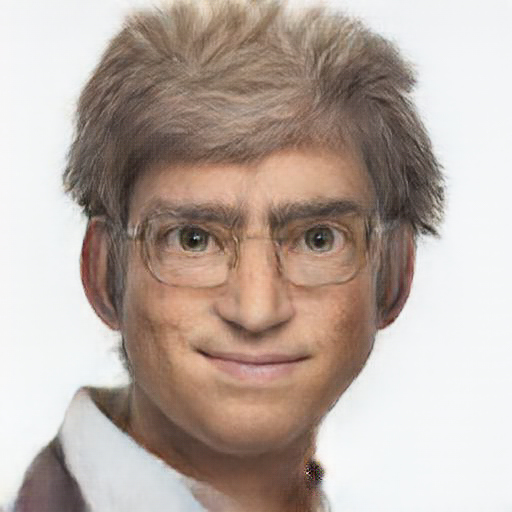

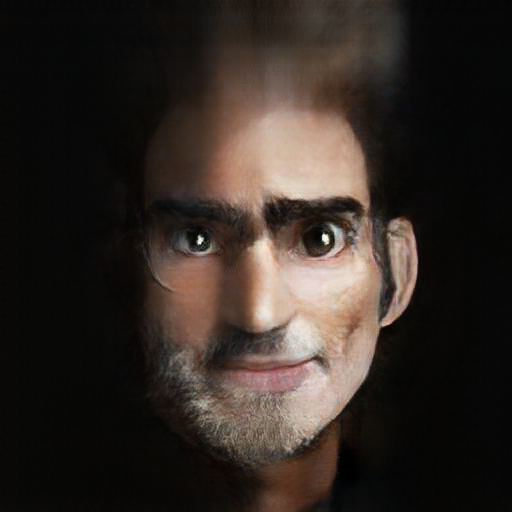

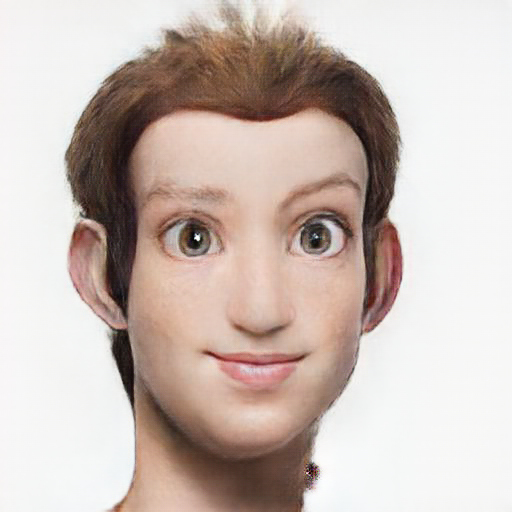

In [ ]:
!zip /content/out.zip -r /content/out/